In [15]:
#Packages needed to load before starting Data Cleaning process

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chardet

In [16]:
# since I am using a file in my local drive, I used this expression to open according the enconding done

file_path = r"C:\Users\Juan.Cardenas\Documents\Python Scripts\EDA project\travel_tourism_dataset.csv"
# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

# Read the CSV with the detected encoding
df = pd.read_csv(file_path, encoding=encoding)

df.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel
0,55,1,20111,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13
1,288,5,29681,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04
2,291,7,24950,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25
3,131,19,18676,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28
4,281,28,18899,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Trip #no.                    3000 non-null   int64 
 1   Duration                     3000 non-null   int64 
 2   Cost of Travel(Entire Trip)  3000 non-null   int64 
 3   Mode of Travel               3000 non-null   object
 4   Stay                         3000 non-null   object
 5   First Name                   3000 non-null   object
 6   Last Name                    3000 non-null   object
 7   Date of Birth                3000 non-null   object
 8   Address                      3000 non-null   object
 9   Age                          3000 non-null   int64 
 10  Sex                          3000 non-null   object
 11  Nationality                  3000 non-null   object
 12  Date of Travel               3000 non-null   object
dtypes: int64(4), object(9)
memory usa

## Origin of tourists

In [5]:
origin = df.groupby('Nationality').size()
total_tourist = origin.sum()
tourist_percentage = (origin/total_tourist)*100

nationality_summary = pd.DataFrame({
    'Number of Tourists': origin,
    'Percentage of Tourists': tourist_percentage
})
nationality_summary.sort_values(by='Number of Tourists', ascending=False, inplace=True)
nationality_summary

,Number of Tourists,Percentage of Tourists
Nationality,,
Korea,31,1.033333
Lebanon,24,0.800000
Congo,23,0.766667
Gambia,23,0.766667
Lao People's Democratic Republic,23,0.766667
...,...,...
Albania,6,0.200000
Tunisia,6,0.200000
Gibraltar,5,0.166667


Origin is irrelevant as the highest one does not represent more than 1% of the total amount of natinalities from tourists.

## Gender

In [6]:
gender = df.groupby('Sex').size()
gender_total = gender.sum()
gender_percentage = (gender/gender_total)*100

gender_summary = pd.DataFrame({
    'Number of Individuals': gender,
    'Percentage of Individuals': gender_percentage
})
gender_summary


,Number of Individuals,Percentage of Individuals
Sex,,
Female,735,24.500000
Male,775,25.833333
Non-Binary,739,24.633333
Transgender,751,25.033333


Gender is also not relevant as it is evenly distributed within the 4 groups. Eahc on represents 1/4 of total (aprox).

## Mode of Travel

In [25]:
transport = df.groupby('Mode of Travel').size()
transport

Mode of Travel
Bus         516
Car         551
Cruise      501
Flight      461
Roadtrip    473
Train       498
dtype: int64

In [26]:
travel_transport = df.groupby('Mode of Travel').agg({'Cost of Travel(Entire Trip)': 'mean'})
travel_transport

,Cost of Travel(Entire Trip)
Mode of Travel,
Bus,17605.990310
Car,18130.148820
Cruise,17811.011976
Flight,17902.605206
Roadtrip,17111.928118
Train,17831.823293


## Stay

In [27]:
stay = df.groupby('Stay').size()
stay

Stay
Airbnb     786
Hotel      724
Other      787
Resorts    703
dtype: int64

In [28]:
stay_transport = df.groupby('Stay').agg({'Cost of Travel(Entire Trip)': 'mean'})
stay_transport

,Cost of Travel(Entire Trip)
Stay,
Airbnb,17960.255725
Hotel,17532.023481
Other,17766.290978
Resorts,17685.624467


### None of the above are significantly different to attribute more weight than the others

## Age

In [32]:
age = df.groupby('Age').size()
age_total = age.sum()
age_percentage = (age/age_total)*100


age_groups = df.groupby('Age').ngroups
print('Total groups:',age_groups)


age_summary = pd.DataFrame({
    'Number of Individuals': age
})

age_summary.reset_index(inplace=True)

age_summary.sort_values(by='Age', ascending=False, inplace=True)

age_summary.head()


Total groups: 58


,Age,Number of Individuals
57,75,43
56,74,56
55,73,50
54,72,56
53,71,53


In [10]:
age_purchase_power = df.groupby('Age').agg({'Cost of Travel(Entire Trip)': 'mean'})
age_purchase_power['Cost of Travel(Entire Trip)'] = age_purchase_power['Cost of Travel(Entire Trip)'] / 1000

mean_cost_of_travel = df['Cost of Travel(Entire Trip)'].mean()
print('Cost of Travel Mean:',mean_cost_of_travel)
age_purchase_power.rename(columns={'Cost of Travel(Entire Trip)': 'Travel Cost (x1000)'}, inplace=True)

age_purchase_power.reset_index(inplace=True)

age_purchase_power.sort_values(by='Age',ascending=False,inplace=True)
age_purchase_power.head()

Cost of Travel Mean: 17741.67033333333


,Age,Travel Cost (x1000)
57,75,18.066070
56,74,17.652821
55,73,15.706980
54,72,17.659411
53,71,16.913774


## Age vs Number of Tourist vs Travel Cost

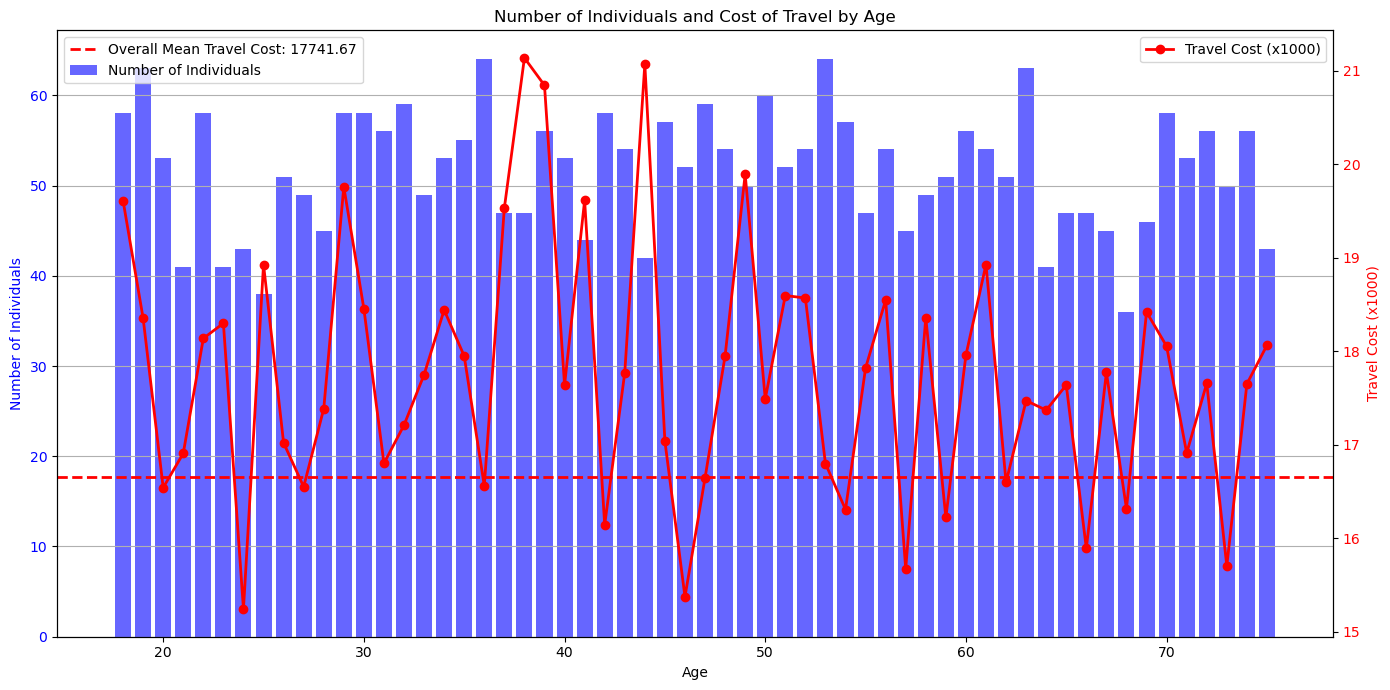

    Age  Number of Individuals  Travel Cost (x1000)
0    75                     43            18.066070
1    74                     56            17.652821
2    73                     50            15.706980
3    72                     56            17.659411
4    71                     53            16.913774
5    70                     58            18.056138
6    69                     46            18.421674
7    68                     36            16.317861
8    67                     45            17.776578
9    66                     47            15.893511
10   65                     47            17.640851
11   64                     41            17.372146
12   63                     63            17.474286
13   62                     51            16.601588
14   61                     54            18.929704
15   60                     56            17.960518
16   59                     51            16.224314
17   58                     49            18.361694
18   57     

In [130]:
merged_df = pd.merge(age_summary,age_purchase_power, on='Age')


merged_df = pd.merge(age_summary, age_purchase_power, on='Age')


fig, ax1 = plt.subplots(figsize=(14, 7))


ax1.bar(merged_df['Age'], merged_df['Number of Individuals'], color='b', alpha=0.6, label='Number of Individuals')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Individuals', color='b')
ax1.tick_params(axis='y', labelcolor='b')


ax2 = ax1.twinx()
ax2.plot(merged_df['Age'], merged_df['Travel Cost (x1000)'], color='r', marker='o', linestyle='-', linewidth=2, label='Travel Cost (x1000)')
ax2.set_ylabel('Travel Cost (x1000)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Number of Individuals and Cost of Travel by Age')
ax1.grid(axis='y')


ax1.axhline(y=mean_cost_of_travel / 1000, color='r', linestyle='--', linewidth=2, label=f'Overall Mean Travel Cost: {mean_cost_of_travel:.2f}')



fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()
print(merged_df)


In [31]:
df.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel
0,55,1,20111,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13
1,288,5,29681,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04
2,291,7,24950,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25
3,131,19,18676,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28
4,281,28,18899,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21


## Top 10 spenders by age

In [47]:
age_spender = df.groupby('Age').agg({'Cost of Travel(Entire Trip)': 'mean'})
age_spender['Cost of Travel(Entire Trip)'] = age_spender['Cost of Travel(Entire Trip)'] / 1000

mean_cost_of_travel = df['Cost of Travel(Entire Trip)'].mean()
print('Cost of Travel Mean:',mean_cost_of_travel)
age_spender.rename(columns={'Cost of Travel(Entire Trip)': 'Travel Cost (x1000)'}, inplace=True)

age_spender.reset_index(inplace=True)

age_spender = pd.merge(age_spender, age_summary, on='Age')

age_spender.sort_values(by='Travel Cost (x1000)',ascending=False,inplace=True)

age_spender.head(10)

Cost of Travel Mean: 17741.67033333333


,Age,Travel Cost (x1000),Number of Individuals
20,38,21.139574,47
26,44,21.073905,42
21,39,20.846214,56
31,49,19.894920,50
11,29,19.761379,58
23,41,19.616205,44
0,18,19.613379,58
19,37,19.534234,47
43,61,18.929704,54
7,25,18.929237,38


## Top 5 Spenders by age perference in:

### Mode of Travel

### Stay

In [42]:
age_38_df = df[df['Age']==38]
travel_38 = age_38_df['Mode of Travel'].value_counts()

travel_38

Mode of Travel
Car         14
Roadtrip     7
Flight       7
Cruise       7
Bus          6
Train        6
Name: count, dtype: int64

In [48]:
top5_age = df[df['Age'].isin([38,44,39,49,29,41,18,37,61,25])]

grouped_counts = top5_age.groupby(['Age', 'Mode of Travel']).size().reset_index(name='Count')


idx = grouped_counts.groupby('Age')['Count'].idxmax()
most_common_travel_mode = grouped_counts.loc[idx]


print(most_common_travel_mode)

    Age Mode of Travel  Count
2    18         Cruise     14
10   25       Roadtrip      9
16   29       Roadtrip     17
18   37            Bus     11
25   38            Car     14
32   39         Cruise     12
37   41            Car     12
44   44         Cruise     12
51   49         Flight     13
54   61            Bus     10


In [49]:
age_38_df = df[df['Age']==38]
travel_38 = age_38_df['Stay'].value_counts()

travel_38

Stay
Resorts    15
Airbnb     11
Other      11
Hotel      10
Name: count, dtype: int64

In [50]:

grouped_counts = top5_age.groupby(['Age', 'Stay']).size().reset_index(name='Count')


idx = grouped_counts.groupby('Age')['Count'].idxmax()
most_common_stay = grouped_counts.loc[idx]


print(most_common_stay)

    Age     Stay  Count
0    18   Airbnb     17
5    25    Hotel     14
8    29   Airbnb     20
12   37   Airbnb     16
19   38  Resorts     15
20   39   Airbnb     18
24   41   Airbnb     12
30   44    Other     14
32   49   Airbnb     15
36   61   Airbnb     16


## Dates

### Quartely by year

In [51]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df['Date of Travel']

0      2022-09-13
1      2021-09-04
2      2021-01-25
3      2022-01-28
4      2021-10-21
          ...    
2995   2023-07-03
2996   2022-08-22
2997   2021-02-08
2998   2021-06-19
2999   2021-08-07
Name: Date of Travel, Length: 3000, dtype: datetime64[ns]

In [56]:
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year
df[['Month','Year']]

,Month,Year
0,9,2022
1,9,2021
2,1,2021
3,1,2022
4,10,2021
...,...,...
2995,7,2023
2996,8,2022
2997,2,2021
2998,6,2021


In [57]:
min_date = df['Date of Travel'].min()
max_date = df['Date of Travel'].max()

print("Minimum Date of Travel:", min_date)
print("Maximum Date of Travel:", max_date)

Minimum Date of Travel: 2020-01-02 00:00:00
Maximum Date of Travel: 2023-08-27 00:00:00


### 2021-2023 (Q3)

In [115]:
df['Quarter'] = df['Date of Travel'].dt.to_period('Q')

year_range = range(2020, 2024)
quarter_counts = {}
quarter_avg_costs = {}

# Iterate through each year and quarter
for year in year_range:
    for quarter in [f"{year}Q1", f"{year}Q2", f"{year}Q3", f"{year}Q4"]:
        filtered_df = df[df['Quarter'] == quarter]
        quarter_count = filtered_df.shape[0]
        quarter_counts[quarter] = quarter_count
        
        avg_cost = filtered_df['Cost of Travel(Entire Trip)'].mean()
        quarter_avg_costs[quarter] = avg_cost

# Print the results
for quarter, count in quarter_counts.items():
    print(f"Entries in {quarter}: {count}")
    
for quarter, avg_cost in quarter_avg_costs.items():
    print(f"Average Cost in {quarter}: {avg_cost}")

Entries in 2020Q1: 192
Entries in 2020Q2: 190
Entries in 2020Q3: 223
Entries in 2020Q4: 217
Entries in 2021Q1: 201
Entries in 2021Q2: 196
Entries in 2021Q3: 184
Entries in 2021Q4: 214
Entries in 2022Q1: 214
Entries in 2022Q2: 204
Entries in 2022Q3: 204
Entries in 2022Q4: 209
Entries in 2023Q1: 194
Entries in 2023Q2: 224
Entries in 2023Q3: 134
Entries in 2023Q4: 0
Average Cost in 2020Q1: 18119.619791666668
Average Cost in 2020Q2: 17509.178947368422
Average Cost in 2020Q3: 17752.991031390135
Average Cost in 2020Q4: 17605.00921658986
Average Cost in 2021Q1: 17824.02487562189
Average Cost in 2021Q2: 17994.561224489797
Average Cost in 2021Q3: 17184.184782608696
Average Cost in 2021Q4: 17768.81308411215
Average Cost in 2022Q1: 18093.406542056076
Average Cost in 2022Q2: 17544.950980392157
Average Cost in 2022Q3: 17240.289215686276
Average Cost in 2022Q4: 18254.58851674641
Average Cost in 2023Q1: 17838.896907216495
Average Cost in 2023Q2: 17693.691964285714
Average Cost in 2023Q3: 17601.470149

### 2021-2023 (Q3) plot

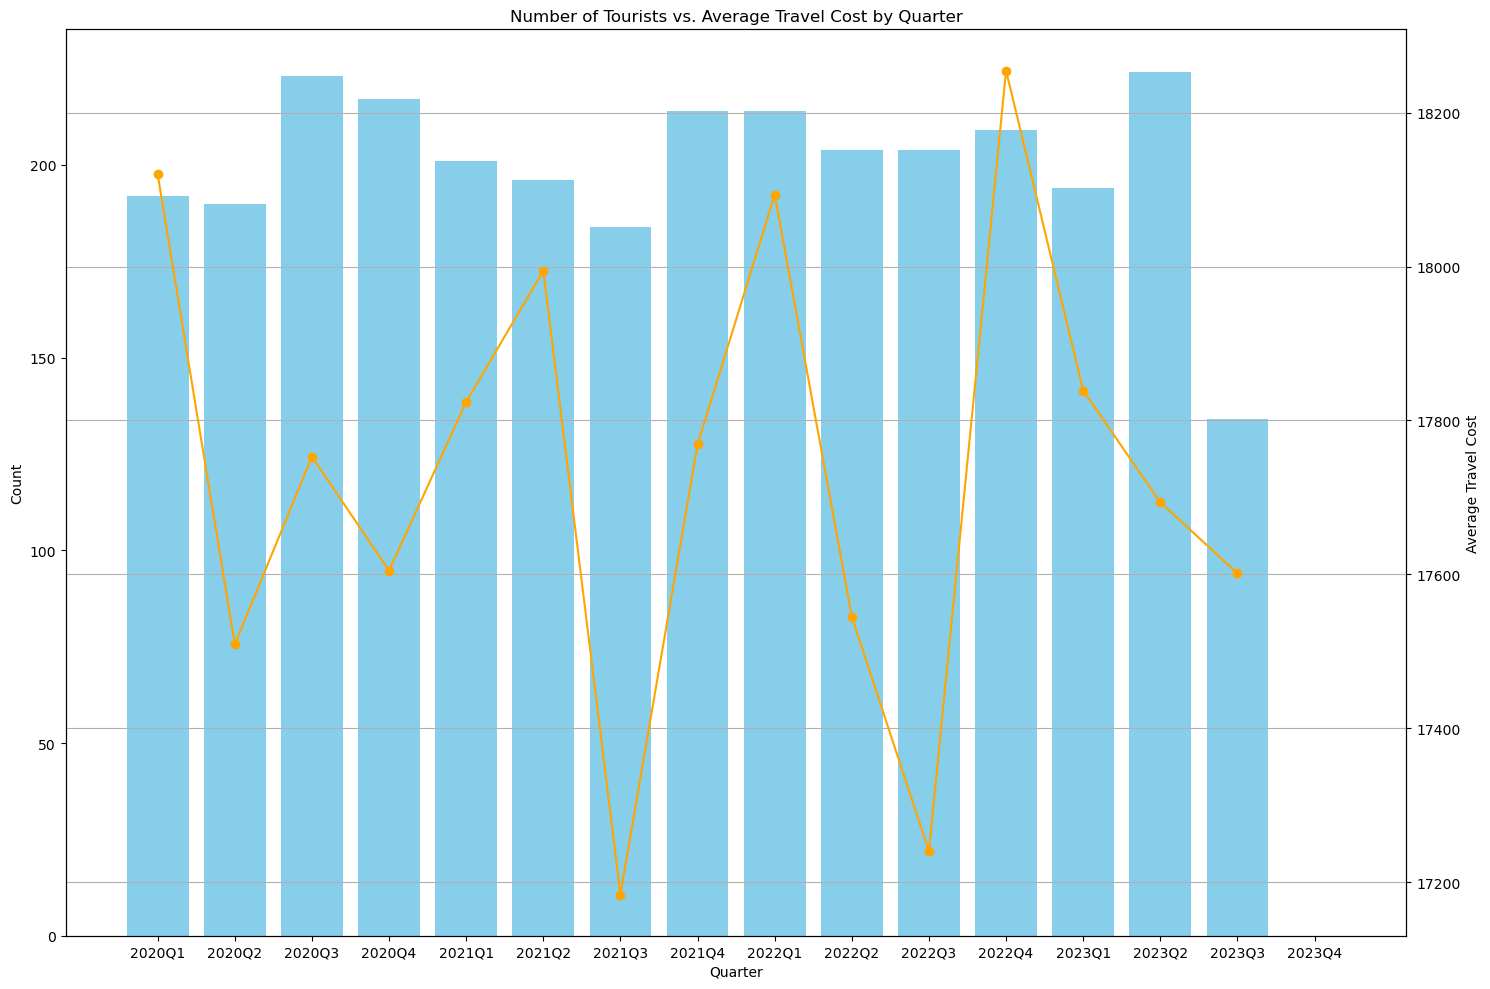

In [125]:

fig, ax1 = plt.subplots(figsize=(15, 10))


ax1.bar(quarter_counts.keys(), quarter_counts.values(), color='skyblue')
ax1.set_title('Number of Tourists vs. Average Travel Cost by Quarter')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Count')


ax2 = ax1.twinx()
ax2.plot(quarter_avg_costs.keys(), quarter_avg_costs.values(), marker='o', color='orange', linestyle='-')
#ax2.set_title('Average Cost of Travel per Quarter')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Average Travel Cost')

plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Trip #no.                    3000 non-null   int64         
 1   Duration                     3000 non-null   int64         
 2   Cost of Travel(Entire Trip)  3000 non-null   int64         
 3   Mode of Travel               3000 non-null   object        
 4   Stay                         3000 non-null   object        
 5   First Name                   3000 non-null   object        
 6   Last Name                    3000 non-null   object        
 7   Date of Birth                3000 non-null   object        
 8   Address                      3000 non-null   object        
 9   Age                          3000 non-null   int64         
 10  Sex                          3000 non-null   object        
 11  Nationality                  3000 non-null 

### Heat Map

#### Duration - Cost of Travel - Age

In [127]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64']]
numerical_cols

['Trip #no.', 'Duration', 'Cost of Travel(Entire Trip)', 'Age']

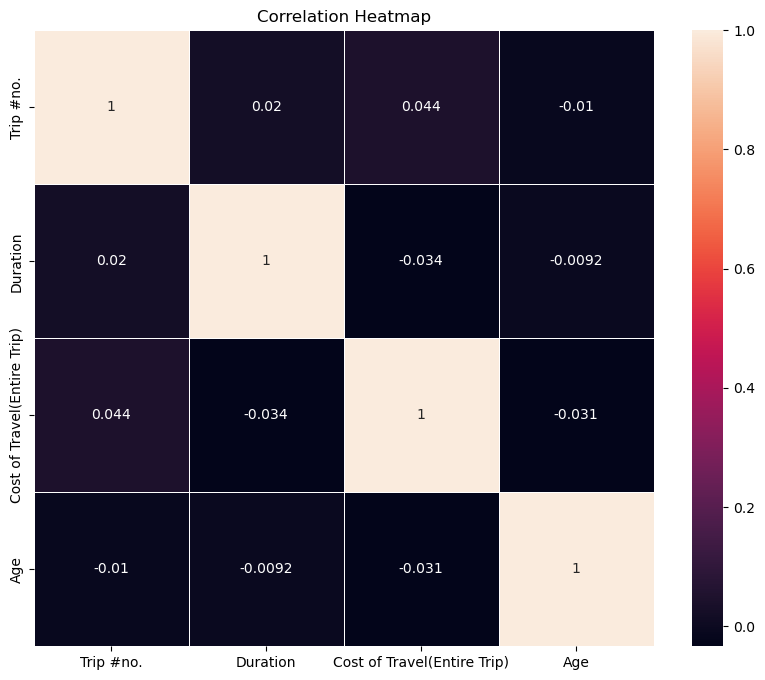

In [128]:
correlation_matrix = df[numerical_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()